## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap NULL scan (paranoid)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_null_scan_paranoid'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    329479.622214
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    329479.622214
1    329479.062805
2    329479.539428
3    329478.499959
4    329478.739817
5    329480.413272
6    329477.277159
7    329479.095644
8    329481.372586
9    329475.938111
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    329478.9561
dtype: float64

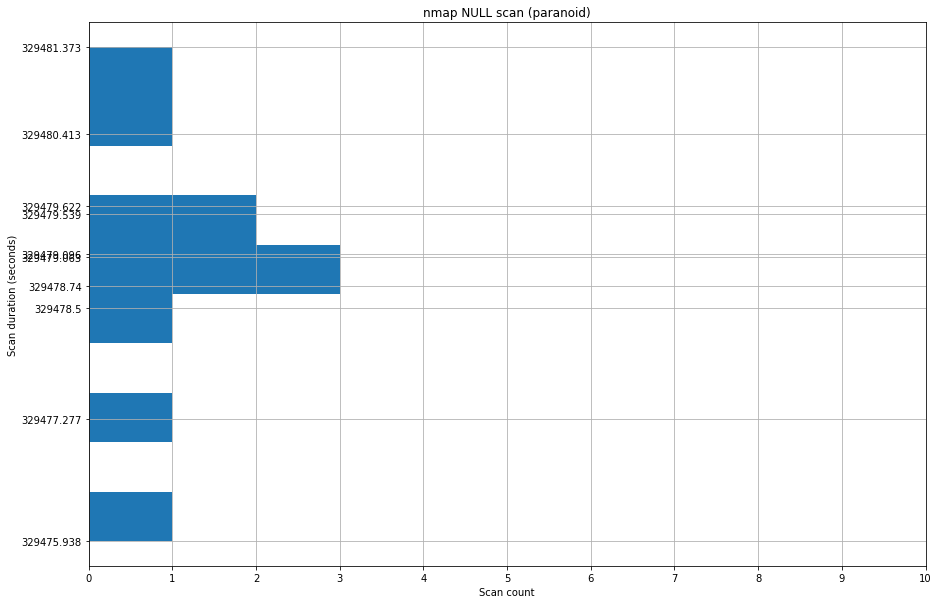

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,329478.956100
std,1.526053
min,329475.938111
25%,329478.559924
50%,329479.079225
75%,329479.601517
max,329481.372586


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 0.06671139261884008



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 43800 995
2 43800 111
3 43800 23
4 43800 256
5 43800 8888
6 43800 1723
7 43800 143
8 43800 139
9 43800 113
10 43800 1025
11 43805 995
12 43800 53
13 43800 5900
14 43800 993
15 43800 22
16 43800 110
17 43800 443
18 43800 587
19 43800 21
20 43800 25
21 43800 1720
22 43807 995
23 43800 199
24 43800 3306
25 43800 3389
26 43800 445
27 43800 8080
28 43800 135
29 43800 554
30 43800 80
31 43800 1096
32 43800 5907
33 43809 995
34 43800 636
35 43800 3077
36 43800 6346
37 43800 9207
38 43800 8654
39 43800 2006
40 43800 2001
41 43800 2875
42 43800 3052
43 43800 6543
44 43811 995
45 43800 1049
46 43800 1001
47 43800 2288
48 43800 7938
49 43800 8031
50 43800 1098
51 43800 13722
52 43800 1755
53 43800 3371
54 43800 1718
55 43813 995
56 43800 19283
57 43800 255
58 43800 3261
59 43800 6100
60 43800 5815
61 43800 1061
62 43800 5825
63 43800 8333
64 43800 8090
65 43800 1114
66 43815 995
67 43800 2500
68 43800 7007
69 43800 2800
70 43800 1038
71 43800 1334
72 43800 10628
73 43800 6000
74 43800 1247
75 4

624 43800 500
625 43800 3030
626 43800 20000
627 43917 995
628 43800 2041
629 43800 524
630 43800 1031
631 43800 4004
632 43800 37
633 43800 8010
634 43800 14442
635 43800 1183
636 43800 84
637 43800 2021
638 43919 995
639 43800 3017
640 43800 26214
641 43800 3001
642 43800 1105
643 43800 4129
644 43800 1087
645 43800 32772
646 43800 8093
647 43800 6112
648 43800 27356
649 43921 995
650 43800 1108
651 43800 1
652 43800 55056
653 43800 427
654 43800 8082
655 43800 3372
656 43800 1839
657 43800 3828
658 43800 1984
659 43800 777
660 43923 995
661 43800 2111
662 43800 5190
663 43800 8009
664 43800 2144
665 43800 1217
666 43800 54328
667 43800 7999
668 43800 32774
669 43800 1102
670 43800 7
671 43925 995
672 43800 4445
673 43800 24
674 43800 5801
675 43800 19315
676 43800 1248
677 43800 1271
678 43800 2522
679 43800 1594
680 43800 32780
681 43800 7627
682 43927 995
683 43800 513
684 43800 1688
685 43800 31337
686 43800 1717
687 43800 2608
688 43800 458
689 43800 1801
690 43800 3880
691 4380

120 49679 81
121 49704 53
122 49679 8086
123 49679 4279
124 49679 5904
125 49679 2605
126 49679 1095
127 49679 3809
128 49679 14238
129 49679 3703
130 49679 20828
131 49679 8400
132 49706 53
133 49679 6689
134 49679 1050
135 49679 1875
136 49679 2003
137 49679 306
138 49679 726
139 49679 1034
140 49679 4004
141 49679 6001
142 49679 2099
143 49708 53
144 49679 691
145 49679 777
146 49679 9081
147 49679 8093
148 49679 1687
149 49679 1213
150 49679 2006
151 49679 617
152 49679 44443
153 49679 3324
154 49710 53
155 49679 15660
156 49679 3390
157 49679 1044
158 49679 7201
159 49679 992
160 49679 8009
161 49679 9535
162 49679 15000
163 49679 5222
164 49679 1594
165 49712 53
166 49679 16993
167 49679 1065
168 49679 6699
169 49679 1501
170 49679 543
171 49679 4662
172 49679 19780
173 49679 6543
174 49679 212
175 49679 1032
176 49714 53
177 49679 49
178 49679 1433
179 49679 7921
180 49679 2045
181 49679 22939
182 49679 2717
183 49679 808
184 49679 2008
185 49679 2042
186 49679 9102
187 49716 53

691 49679 3945
692 49679 1038
693 49808 53
694 49679 6002
695 49679 8001
696 49679 787
697 49679 1110
698 49679 10082
699 49679 8090
700 49679 3551
701 49679 49165
702 49679 700
703 49679 84
704 49810 53
705 49679 35500
706 49679 5080
707 49679 1084
708 49679 27000
709 49679 52822
710 49679 6669
711 49679 5666
712 49679 2399
713 49679 55055
714 49679 514
715 49812 53
716 49679 3493
717 49679 1352
718 49679 7512
719 49679 23502
720 49679 90
721 49679 31337
722 49679 2909
723 49679 6547
724 49679 144
725 49679 5730
726 49814 53
727 49679 3168
728 49679 5405
729 49679 1717
730 49679 1045
731 49679 10626
732 49679 32779
733 49679 765
734 49679 1061
735 49679 1043
736 49679 425
737 49816 53
738 49679 3995
739 49679 6003
740 49679 417
741 49679 1076
742 49679 3333
743 49679 9418
744 49679 5907
745 49679 9415
746 49679 2710
747 49679 6792
748 49818 53
749 49679 1434
750 49679 50500
751 49679 8333
752 49679 3268
753 49679 32770
754 49679 6580
755 49679 5801
756 49679 5200
757 49679 500
758 496

258 57301 2191
259 57301 1217
260 57301 1040
261 57301 10215
262 57301 3013
263 57301 5678
264 57352 3389
265 57301 8011
266 57301 5101
267 57301 6646
268 57301 8222
269 57301 1038
270 57301 1090
271 57301 5631
272 57301 8002
273 57301 5903
274 57301 17
275 57354 3389
276 57301 1137
277 57301 7100
278 57301 6779
279 57301 9943
280 57301 5850
281 57301 7103
282 57301 9898
283 57301 992
284 57301 1009
285 57301 1151
286 57356 3389
287 57301 32773
288 57301 1027
289 57301 24800
290 57301 8008
291 57301 1244
292 57301 49154
293 57301 11111
294 57301 720
295 57301 1310
296 57301 3370
297 57358 3389
298 57301 9081
299 57301 9220
300 57301 50001
301 57301 8290
302 57301 52848
303 57301 32768
304 57301 8087
305 57301 50300
306 57301 6346
307 57301 1034
308 57360 3389
309 57301 667
310 57301 458
311 57301 5910
312 57301 7627
313 57301 5902
314 57301 5915
315 57301 1072
316 57301 4445
317 57301 9502
318 57301 1875
319 57362 3389
320 57301 3128
321 57301 5801
322 57301 5054
323 57301 18101
324 57

925 57301 3371
926 57301 7937
927 57301 1023
928 57301 89
929 57301 119
930 57301 24
931 57301 50000
932 57301 1002
933 57301 1443
934 57301 1123
935 57474 3389
936 57301 51493
937 57301 6566
938 57301 1524
939 57301 12000
940 57301 3546
941 57301 33899
942 57301 11967
943 57301 3703
944 57301 5061
945 57301 1000
946 57476 3389
947 57301 1028
948 57301 10082
949 57301 1084
950 57301 3801
951 57301 2557
952 57301 3800
953 57301 1185
954 57301 50389
955 57301 3689
956 57301 3031
957 57478 3389
958 57301 42
959 57301 3828
960 57301 6543
961 57301 5718
962 57301 2910
963 57301 1052
964 57301 9003
965 57301 711
966 57301 58080
967 57301 1091
968 57480 3389
969 57301 2366
970 57301 1521
971 57301 5999
972 57301 5679
973 57301 6004
974 57301 1082
975 57301 1201
976 57301 5440
977 57301 179
978 57301 18988
979 57482 3389
980 57301 1984
981 57301 51103
982 57301 16993
983 57301 2005
984 57301 1126
985 57301 1131
986 57301 52869
987 57301 6025
988 57301 49155
989 57301 10621
990 57484 3389
991 5

492 57084 1152
493 57084 5987
494 57084 3404
495 57177 443
496 57084 2046
497 57084 1089
498 57084 2809
499 57084 18101
500 57084 2003
501 57084 26
502 57084 5989
503 57084 9898
504 57084 259
505 57084 2525
506 57179 443
507 57084 548
508 57084 34572
509 57084 3007
510 57084 1073
511 57084 19315
512 57084 3030
513 57084 3945
514 57084 10626
515 57084 3871
516 57084 27353
517 57181 443
518 57084 1862
519 57084 8654
520 57084 4662
521 57084 1322
522 57084 1688
523 57084 9009
524 57084 5500
525 57084 3269
526 57084 222
527 57084 9207
528 57183 443
529 57084 8000
530 57084 3077
531 57084 2492
532 57084 1009
533 57084 1111
534 57084 1583
535 57084 691
536 57084 1461
537 57084 50006
538 57084 1187
539 57185 443
540 57084 9080
541 57084 1104
542 57084 1114
543 57084 5431
544 57084 6699
545 57084 1201
546 57084 82
547 57084 8333
548 57084 898
549 57084 2604
550 57187 443
551 57084 3826
552 57084 90
553 57084 50000
554 57084 60020
555 57084 50500
556 57084 1105
557 57084 1717
558 57084 2135
559

59 54653 10012
60 54653 2557
61 54653 9200
62 54653 10629
63 54653 1029
64 54653 5952
65 54653 37
66 54668 80
67 54653 7777
68 54653 56737
69 54653 3031
70 54653 1031
71 54653 5100
72 54653 2522
73 54653 5051
74 54653 9968
75 54653 60020
76 54653 1048
77 54670 80
78 54653 3017
79 54653 1147
80 54653 1045
81 54653 2144
82 54653 1068
83 54653 6692
84 54653 444
85 54653 1023
86 54653 12174
87 54653 32769
88 54672 80
89 54653 6
90 54653 3369
91 54653 2121
92 54653 1217
93 54653 1783
94 54653 2040
95 54653 6006
96 54653 6123
97 54653 2968
98 54653 1666
99 54674 80
100 54653 2200
101 54653 8088
102 54653 683
103 54653 1218
104 54653 3828
105 54653 5003
106 54653 8200
107 54653 32768
108 54653 8899
109 54653 3268
110 54676 80
111 54653 1687
112 54653 8994
113 54653 81
114 54653 1035
115 54653 3052
116 54653 2323
117 54653 49167
118 54653 20000
119 54653 8010
120 54653 1092
121 54678 80
122 54653 3689
123 54653 1165
124 54653 5432
125 54653 1186
126 54653 7004
127 54653 26214
128 54653 880
129

726 54788 80
727 54653 1352
728 54653 8193
729 54653 2909
730 54653 2602
731 54653 13782
732 54653 27355
733 54653 56738
734 54653 1010
735 54653 5001
736 54653 13722
737 54790 80
738 54653 1097
739 54653 2009
740 54653 41511
741 54653 2008
742 54653 873
743 54653 6566
744 54653 27715
745 54653 8082
746 54653 700
747 54653 1033
748 54792 80
749 54653 1935
750 54653 1093
751 54653 4343
752 54653 34572
753 54653 5555
754 54653 1501
755 54653 9050
756 54653 9220
757 54653 5989
758 54653 1076
759 54794 80
760 54653 3690
761 54653 49176
762 54653 1271
763 54653 8291
764 54653 7921
765 54653 1064
766 54653 1840
767 54653 61900
768 54653 9080
769 54653 63331
770 54796 80
771 54653 109
772 54653 9091
773 54653 42
774 54653 20005
775 54653 32779
776 54653 13
777 54653 3211
778 54653 5678
779 54653 5009
780 54653 1089
781 54798 80
782 54653 10566
783 54653 5850
784 54653 4045
785 54653 1755
786 54653 16993
787 54653 49
788 54653 5925
789 54653 16113
790 54653 88
791 54653 1071
792 54800 80
793 5

293 49702 32
294 49702 10617
295 49702 9944
296 49702 30000
297 49759 3306
298 49702 6001
299 49702 9943
300 49702 631
301 49702 3851
302 49702 32768
303 49702 2045
304 49702 5825
305 49702 49400
306 49702 32785
307 49702 2492
308 49761 3306
309 49702 8701
310 49702 7921
311 49702 2049
312 49702 32781
313 49702 1863
314 49702 61532
315 49702 5405
316 49702 2718
317 49702 8652
318 49702 21571
319 49763 3306
320 49702 22939
321 49702 10215
322 49702 5904
323 49702 1069
324 49702 4446
325 49702 3367
326 49702 1600
327 49702 3784
328 49702 1719
329 49702 8031
330 49765 3306
331 49702 84
332 49702 20222
333 49702 1187
334 49702 2007
335 49702 1862
336 49702 2393
337 49702 2920
338 49702 1028
339 49702 8088
340 49702 2601
341 49767 3306
342 49702 6788
343 49702 1081
344 49702 19
345 49702 3372
346 49702 5120
347 49702 3404
348 49702 32776
349 49702 981
350 49702 1104
351 49702 1049
352 49769 3306
353 49702 11110
354 49702 1119
355 49702 85
356 49702 1047
357 49702 2119
358 49702 1052
359 497

959 49702 2135
960 49702 1026
961 49702 3324
962 49702 545
963 49702 8010
964 49702 1123
965 49702 100
966 49702 10012
967 49702 1839
968 49881 3306
969 49702 19350
970 49702 41511
971 49702 259
972 49702 1149
973 49702 8045
974 49702 6502
975 49702 8994
976 49702 10004
977 49702 5915
978 49702 5822
979 49883 3306
980 49702 3828
981 49702 7778
982 49702 625
983 49702 64680
984 49702 1067
985 49702 17988
986 49702 11111
987 49702 1042
988 49702 6580
989 49702 3689
990 49885 3306
991 49702 1000
992 49702 20005
993 49702 49175
994 49702 18040
995 49702 15004
996 49702 1721
997 49702 5030
998 49702 1
999 49702 4900
1000 49702 2006
1001 49887 3306
1002 49702 83
1003 49702 34573
1004 49702 1163
1005 49702 2288
1006 49702 9500
1007 49702 10024
1008 49702 1199
1009 49702 1132
1010 49702 1183
1011 49702 2190
1012 49889 3306
1013 49702 5432
1014 49702 1935
1015 49702 8800
1016 49702 8007
1017 49702 2126
1018 49702 119
1019 49702 55056
1020 49702 20221
1021 49702 3920
1022 49702 2005
1023 49891 3

526 43650 6699
527 43650 6002
528 43749 587
529 43650 8500
530 43650 801
531 43650 5050
532 43650 5030
533 43650 563
534 43650 45100
535 43650 17
536 43650 2004
537 43650 44442
538 43650 514
539 43751 587
540 43650 1782
541 43650 5269
542 43650 2608
543 43650 2718
544 43650 35500
545 43650 416
546 43650 5510
547 43650 6346
548 43650 5280
549 43650 1077
550 43753 587
551 43650 3828
552 43650 1174
553 43650 9878
554 43650 3369
555 43650 8400
556 43650 1974
557 43650 497
558 43650 1030
559 43650 1322
560 43650 1700
561 43755 587
562 43650 49156
563 43650 2002
564 43650 7007
565 43650 14238
566 43650 1147
567 43650 8011
568 43650 1046
569 43650 212
570 43650 50500
571 43650 9593
572 43757 587
573 43650 6543
574 43650 7741
575 43650 5033
576 43650 1688
577 43650 6059
578 43650 50800
579 43650 1072
580 43650 2006
581 43650 20221
582 43650 1840
583 43759 587
584 43650 524
585 43650 23502
586 43650 62078
587 43650 2869
588 43650 1183
589 43650 10621
590 43650 5061
591 43650 1187
592 43650 4446

94 43388 8031
95 43388 1443
96 43388 2811
97 43388 3260
98 43388 1185
99 43409 443
100 43388 32784
101 43388 668
102 43388 2000
103 43388 636
104 43388 8800
105 43388 1247
106 43388 3011
107 43388 10025
108 43388 6101
109 43388 20828
110 43411 443
111 43388 524
112 43388 1079
113 43388 3301
114 43388 8002
115 43388 26214
116 43388 2005
117 43388 9877
118 43388 32781
119 43388 1106
120 43388 1688
121 43413 443
122 43388 32773
123 43388 992
124 43388 10617
125 43388 8022
126 43388 1027
127 43388 2034
128 43388 1556
129 43388 3998
130 43388 7676
131 43388 125
132 43415 443
133 43388 1130
134 43388 3369
135 43388 32779
136 43388 9290
137 43388 8291
138 43388 10626
139 43388 548
140 43388 44443
141 43388 89
142 43388 8001
143 43417 443
144 43388 720
145 43388 3
146 43388 1131
147 43388 5988
148 43388 9103
149 43388 85
150 43388 3659
151 43388 2047
152 43388 1137
153 43388 2103
154 43419 443
155 43388 6692
156 43388 65389
157 43388 11967
158 43388 6565
159 43388 5903
160 43388 1783
161 43388

760 43388 12265
761 43388 5959
762 43388 259
763 43388 1075
764 43388 8701
765 43388 6059
766 43388 901
767 43388 2260
768 43388 9111
769 43388 1048
770 43531 443
771 43388 4242
772 43388 49176
773 43388 2144
774 43388 30951
775 43388 783
776 43388 1060
777 43388 1152
778 43388 32
779 43388 787
780 43388 27356
781 43533 443
782 43388 7402
783 43388 416
784 43388 1038
785 43388 691
786 43388 1050
787 43388 5631
788 43388 8651
789 43388 6123
790 43388 8600
791 43388 1248
792 43535 443
793 43388 3333
794 43388 6006
795 43388 55600
796 43388 90
797 43388 1051
798 43388 49158
799 43388 16012
800 43388 6969
801 43388 8181
802 43388 880
803 43537 443
804 43388 3737
805 43388 625
806 43388 3814
807 43388 2968
808 43388 7004
809 43388 5802
810 43388 7920
811 43388 32775
812 43388 1063
813 43388 32772
814 43539 443
815 43388 9929
816 43388 1047
817 43388 1089
818 43388 631
819 43388 9503
820 43388 5101
821 43388 9418
822 43388 10010
823 43388 10000
824 43388 10566
825 43541 443
826 43388 50389
8

661 36299 109
662 36299 8099
663 36299 79
664 36299 34573
665 36299 9898
666 36299 1043
667 36299 1057
668 36299 9071
669 36299 1049
670 36299 311
671 36424 993
672 36299 5050
673 36299 5811
674 36299 125
675 36299 1130
676 36299 24444
677 36299 5925
678 36299 49155
679 36299 2251
680 36299 8031
681 36299 1417
682 36426 993
683 36299 6689
684 36299 6699
685 36299 787
686 36299 999
687 36299 2005
688 36299 9968
689 36299 873
690 36299 1501
691 36299 1272
692 36299 8009
693 36428 993
694 36299 1974
695 36299 32774
696 36299 6667
697 36299 1187
698 36299 10000
699 36299 24800
700 36299 85
701 36299 5901
702 36299 1145
703 36299 1076
704 36430 993
705 36299 14442
706 36299 1700
707 36299 3971
708 36299 1141
709 36299 1061
710 36299 3784
711 36299 44176
712 36299 903
713 36299 8654
714 36299 1455
715 36432 993
716 36299 60443
717 36299 427
718 36299 9091
719 36299 1033
720 36299 5500
721 36299 5101
722 36299 1036
723 36299 8008
724 36299 7443
725 36299 5100
726 36434 993
727 36299 7
728 362

228 61620 8010
229 61620 212
230 61620 8031
231 61665 8888
232 61620 2144
233 61620 6901
234 61620 1099
235 61620 6788
236 61620 3128
237 61620 65129
238 61620 2002
239 61620 163
240 61620 1021
241 61620 2005
242 61667 8888
243 61620 1031
244 61620 61532
245 61620 1533
246 61620 2800
247 61620 1010
248 61620 8300
249 61620 3323
250 61620 1352
251 61620 3031
252 61620 8022
253 61669 8888
254 61620 50006
255 61620 32782
256 61620 15000
257 61620 27353
258 61620 19842
259 61620 19
260 61620 30951
261 61620 2008
262 61620 6779
263 61620 1328
264 61671 8888
265 61620 15660
266 61620 16001
267 61620 1141
268 61620 3003
269 61620 32785
270 61620 9968
271 61620 7200
272 61620 705
273 61620 5225
274 61620 2049
275 61673 8888
276 61620 512
277 61620 1583
278 61620 6502
279 61620 50300
280 61620 8649
281 61620 1641
282 61620 17988
283 61620 8400
284 61620 6000
285 61620 366
286 61675 8888
287 61620 1148
288 61620 1198
289 61620 667
290 61620 8222
291 61620 34571
292 61620 4321
293 61620 2191
294 

894 61620 5120
895 61620 2718
896 61620 5915
897 61620 2001
898 61620 1840
899 61620 50003
900 61620 63331
901 61620 9090
902 61787 8888
903 61620 1096
904 61620 7
905 61620 3880
906 61620 7443
907 61620 1088
908 61620 6567
909 61620 1998
910 61620 1050
911 61620 1092
912 61620 9500
913 61789 8888
914 61620 20
915 61620 1091
916 61620 9929
917 61620 3052
918 61620 7019
919 61620 8600
920 61620 60443
921 61620 458
922 61620 32780
923 61620 683
924 61791 8888
925 61620 17877
926 61620 2190
927 61620 179
928 61620 8085
929 61620 16113
930 61620 3827
931 61620 6565
932 61620 1503
933 61620 34573
934 61620 1027
935 61793 8888
936 61620 32778
937 61620 1301
938 61620 2000
939 61620 88
940 61620 6346
941 61620 1259
942 61620 49155
943 61620 3
944 61620 5911
945 61620 2381
946 61795 8888
947 61620 3372
948 61620 64623
949 61620 8899
950 61620 1076
951 61620 5963
952 61620 27715
953 61620 3889
954 61620 481
955 61620 1300
956 61620 1062
957 61797 8888
958 61620 9943
959 61620 2710
960 61620 909

In [14]:
orders_port

,scannr,sport,dport
0,1,43800,995
1,2,43800,111
2,3,43800,23
3,4,43800,256
4,5,43800,8888
...,...,...,...
10985,1095,61620,1082
10986,1096,61620,4000
10987,1097,61620,6101
10988,1098,61620,1761


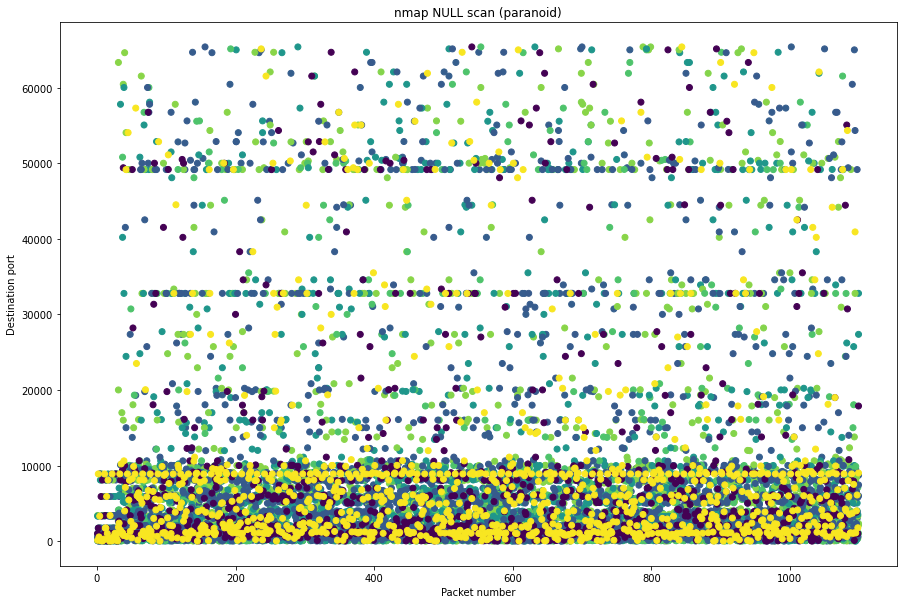

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

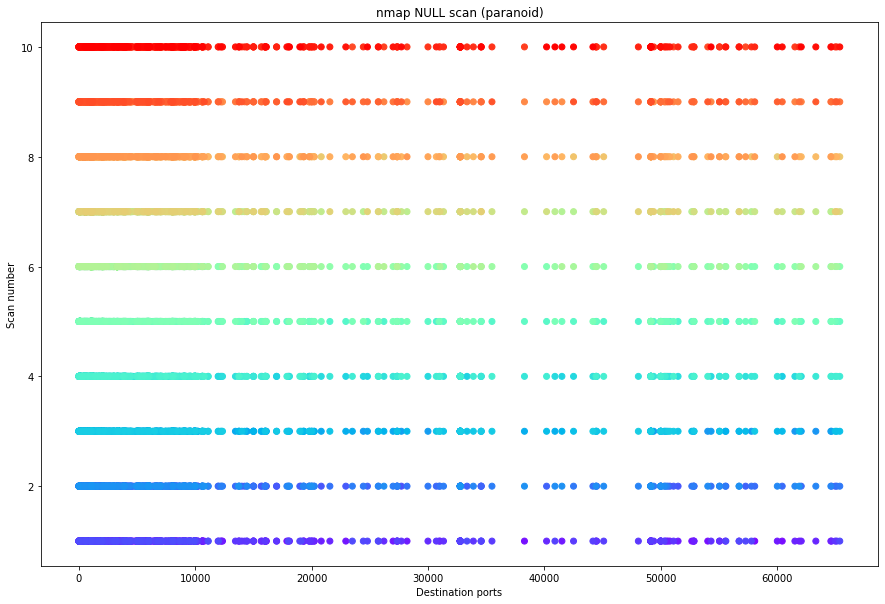

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

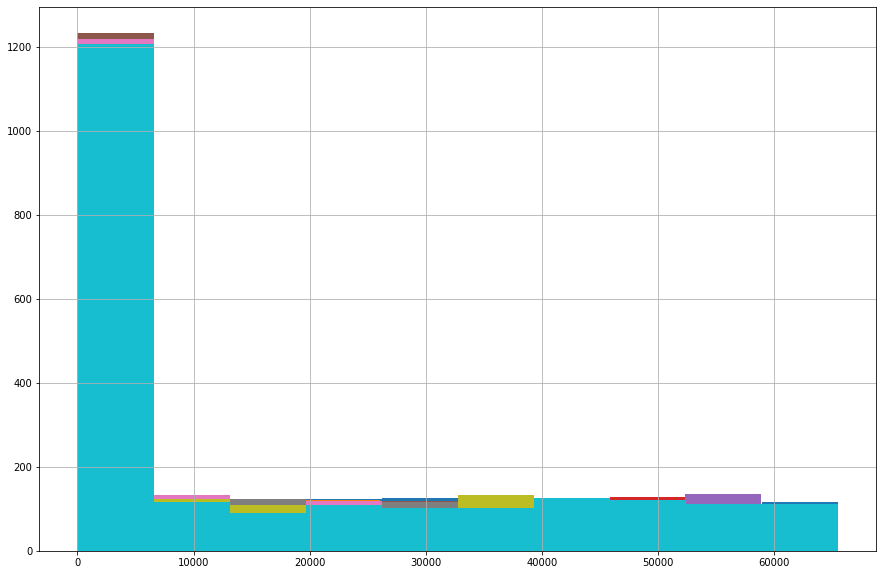

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

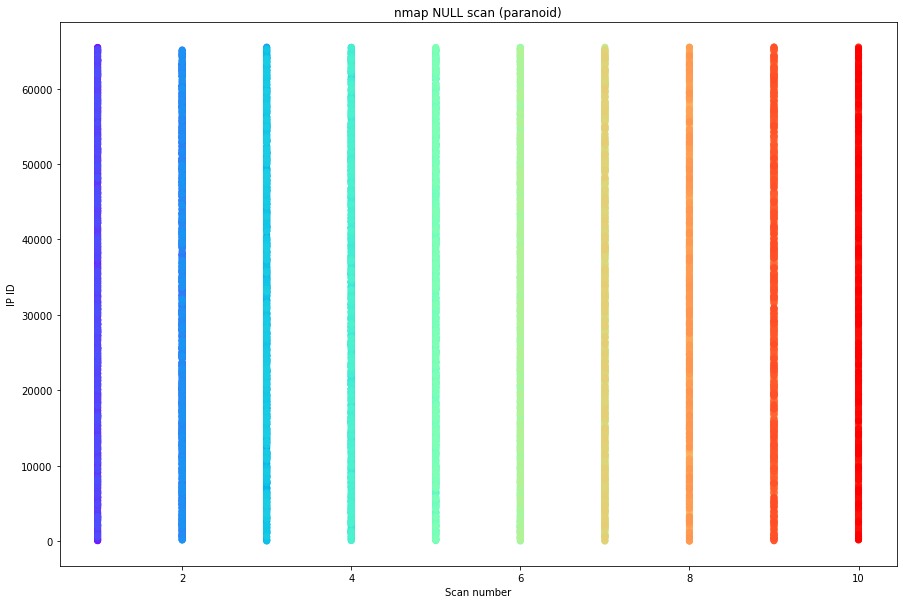

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


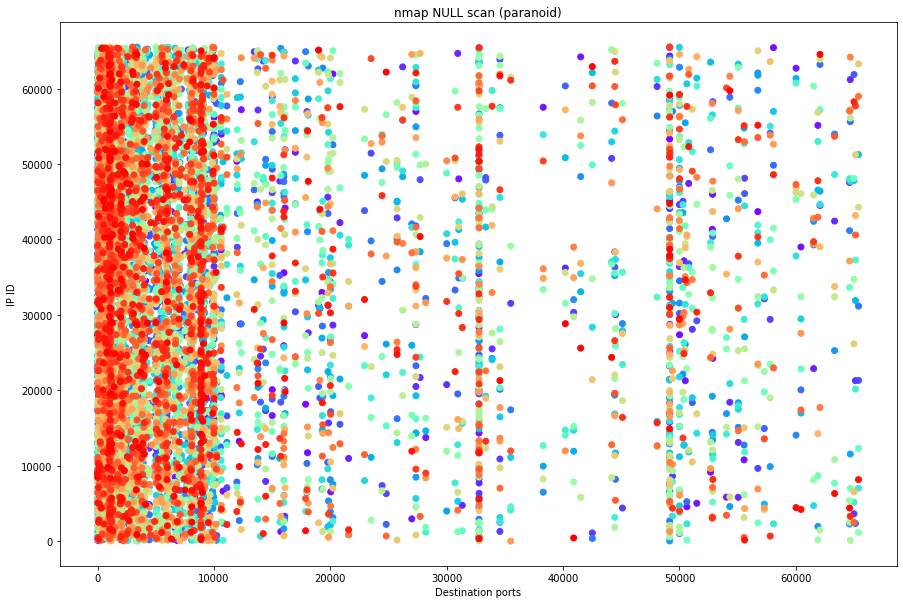

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

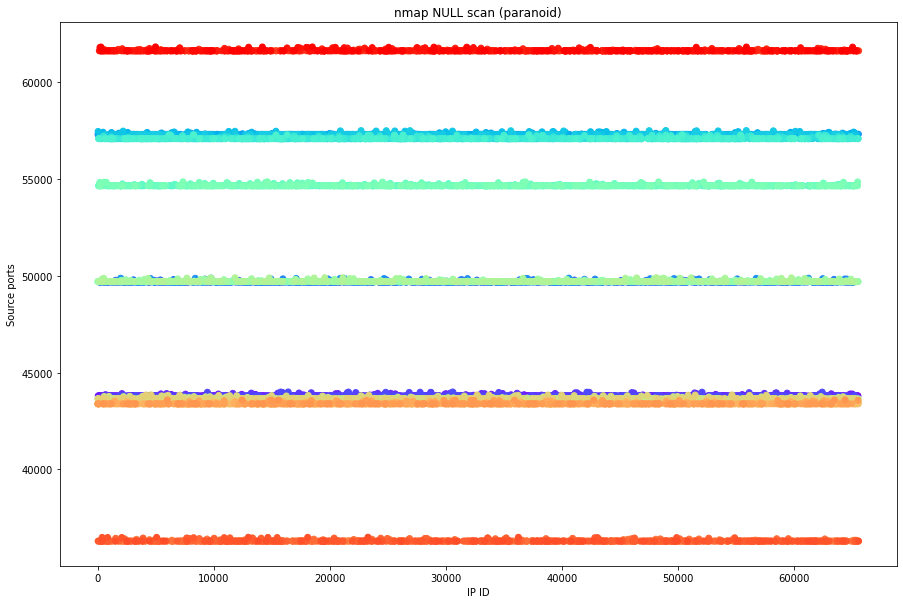

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986470217
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986339147
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986732357
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 198

Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1995514335
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1995907545
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 1995776475
Sequence number: 1986142540
Sequence number: 1986142540
Sequence number: 198

Sequence number: 921458469
Sequence number: 915625818
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 913135524
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 913266598
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 921458469
Sequence number: 912873376
Sequence number: 921458469
Sequence number: 921458469
S

Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4156645135
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4156776205
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4158480147
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 4155268962
Sequence number: 415

Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 797770190
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 797901260
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 798032338
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
S

Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 792527230
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 792658300
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 788595010
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
Sequence number: 799015395
S

Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3387188229
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3382338683
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3382207609
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 3386598458
Sequence number: 338

Sequence number: 3920905628
Sequence number: 3917956527
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3917563305
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3917694379
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3918349733
Sequence number: 392

Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3911533837
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3911664911
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3911271689
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 3920905628
Sequence number: 392

Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2457307990
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2458487720
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2458618794
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 2450033449
Sequence number: 245

Sequence number: 333729132
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 333860206
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 333466984
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 333598058
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
S

Sequence number: 334843261
Sequence number: 322063802
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 322719156
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
Sequence number: 334843261
-----
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601055041
Sequence number: 2601382724
Sequence number: 2601382724
Sequence 

Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2606166815
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2605773593
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2605904667
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 2601382724
Sequence number: 260

Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1741203112
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1741334186
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1741465260
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 173

Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1730324034
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1730455108
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1730586182
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 1736550113
Sequence number: 173

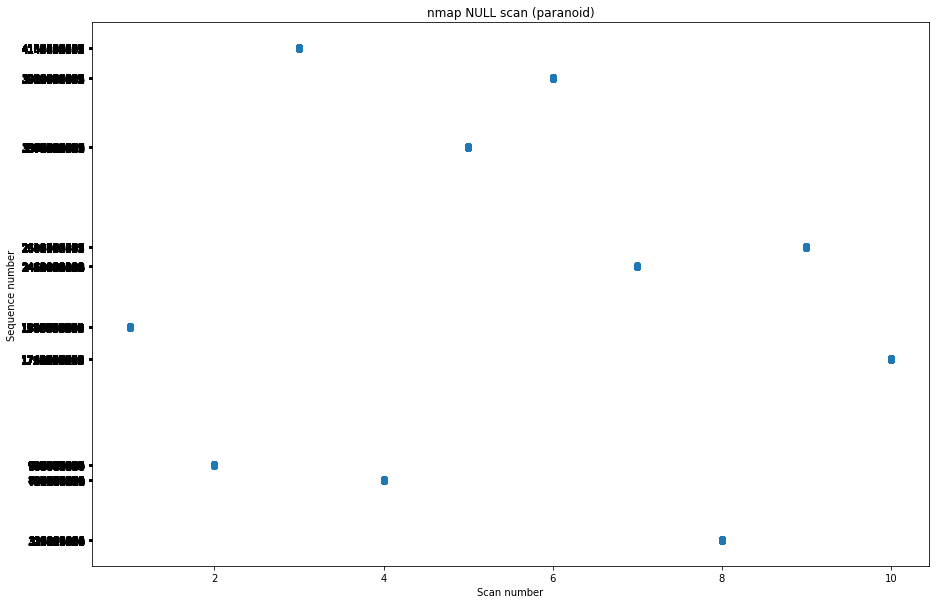

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

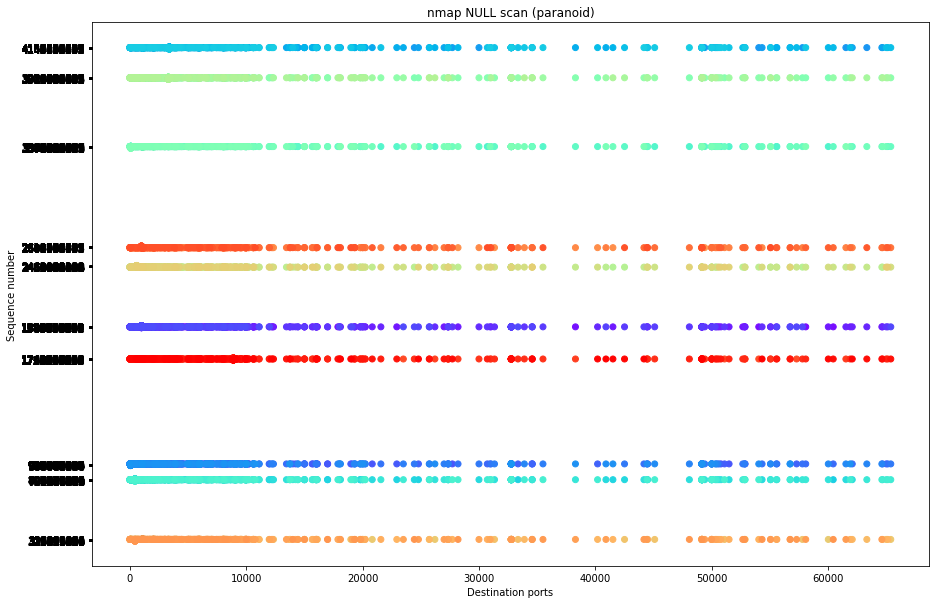

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

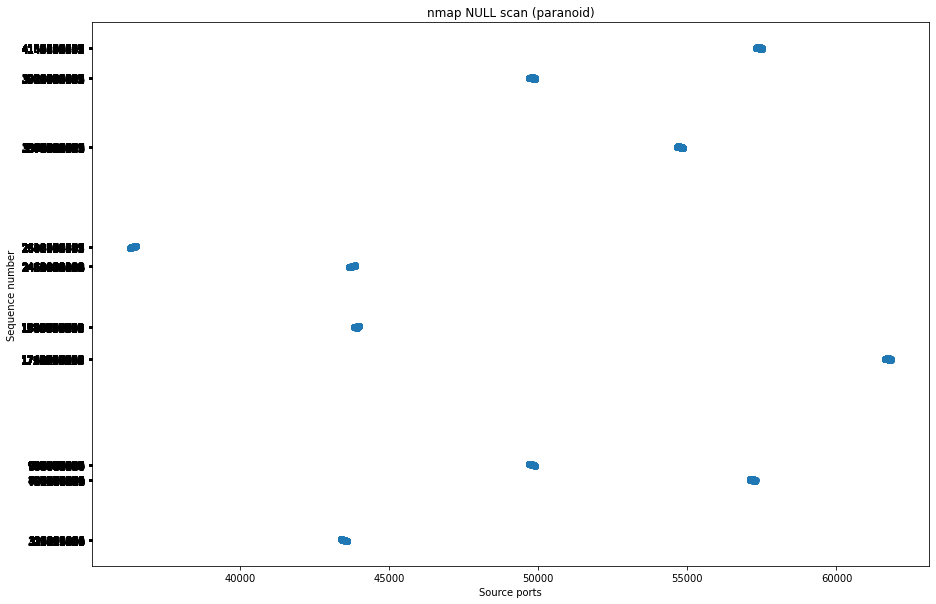

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

975

In [31]:
orders_port['sport'].value_counts()[:30]

49702    1001
43800    1000
43388    1000
57301    1000
49679    1000
36299    1000
57084    1000
43650    1000
61620    1000
54653    1000
43823       2
43849       2
43807       2
43809       2
43811       2
43813       2
43815       2
43825       2
43819       2
43821       2
43805       2
43851       2
43817       2
43847       2
43833       2
43843       2
43829       2
43839       2
43837       2
43831       2
Name: sport, dtype: int64

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
-----
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flag

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan